In [1]:
#install qiskit if you have to
#install qiskit-ionq if you have to

In [2]:
#import IonQ backends

#Import other qiskit requirements


### Question 1 : Implementing CNOT (Simulator vs. Hardware)

(i) Implement a simple quantum circuit with one CNOT gate and plot a histogram of the execution results
(ii) Repeat part (i), but use IonQ hardware, and observe the differences in the histogram
(iii) Now implement a quantum circuit with a CNOT gate that is activated when the control is in the state $\left| 0 \right>$ 

In [3]:
#Instantiate a circuit with two qubits and two classical bits
# Apply the CNOT gate with control qubit 0 and target qubit 1

# Measure all the qubits

    
#Draw the circuit to visualize it 

┌─┐   
q_0: ──■──┤M├───
     ┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

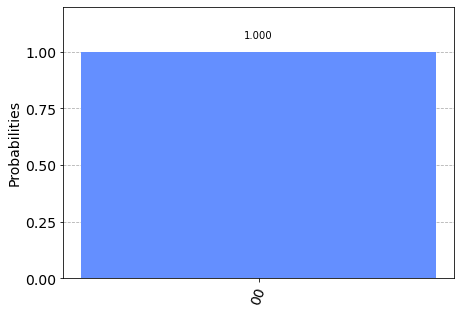

In [4]:
#choose your backend
#create the job object
#create the result object
#get the counts dictionary
#plot the histogram of counts

This result makes sense : the control bit was in the state $\left| 0 \right>$, and therefore the target bit, which was in the state $\left| 0 \right>$ did not change. Now, let us run the circuit on IonQ hardware and see what happens

/Users/abhay/opt/anaconda3/lib/python3.8/site-packages/qiskit/execute_function.py:343: UserWarning: Option parameter_binds is not used by this backend
  job = backend.run(experiments, **run_kwargs)


Job status is JobStatus.INITIALIZING
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED


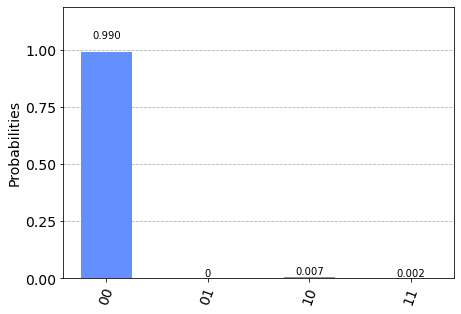

In [5]:
#choose your backend
#get the job objecct

# check if job is complete
    
# get result object
#get the counts dictionary
#plot the histogram of the counts    

So this time, we have some occurrences of the wrong results in the histogram. We should have ideally received all bit strings in the state $\left| 00 \right>$. But we have occurrences of other bit strings as well. This is because of errors in the quantum computer. Now, we haven't received too many occurrences of other bit strings, and that is because IonQ's quantum computers have very high fidelities - low error.

Finally, we need to make a CNOT gate that gets activated when the control bit is in the state $\left| 0 \right>$. How can we do this? Well, our traditional CNOT gate gets activated when the control qubit is in the state $\left| 1 \right>$. What if we add an $X$ gate before the CNOT gate in the path of the control qubit? What this will do is 

- change the $\left| 0 \right>$ state to the $\left| 1 \right>$ state, which will then activate the regular CNOT gate. So the state $\left| 0 \right>$ will effectively activate the CNOT gate.

- change the $\left| 1 \right>$ state to the $\left 0 \right>$ state, which will then not activate the regular CNOT gate. So the $\left| 1 \right>$ state will not activate the CNOT gate anymore.

Finally, we will have to undo the effect of the $X$ gate that we will apply. So we will need to add an $X$ gate at the end.

Okay, let us try it!

In [12]:
# First we will create our very own, new quantum gate

#Our gate is a two-qubit gate, so initialize a two-qubit quantum circuit
#our gate has a NOT gate
#our gate then has a CNOT gate
#then we have a NOT gate
#visualize

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘

In [13]:
#convert your circuit to a gate


qiskit.circuit.gate.Gate

In [14]:
#Instantiate a circuit with two qubits and two classical bits
# Apply your special CNOT gate with control qubit 0 and target qubit 1
 
# Measure all the qubits

    
#Draw the circuit to visualize it 

┌─────────────┐┌─┐   
q_0: ┤0            ├┤M├───
     │  circuit-95 │└╥┘┌─┐
q_1: ┤1            ├─╫─┤M├
     └─────────────┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1

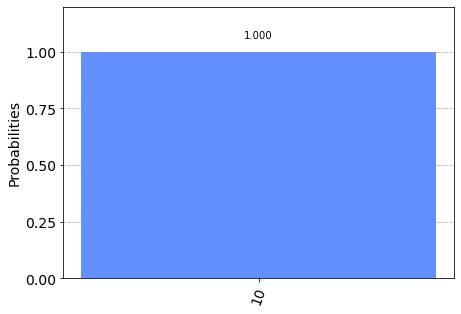

In [15]:
#choose your backend
#create the job object
#create the result object
#get the counts dictionary
#plot the histogram of counts

This is the expected result. The bit string displayed in the histogram should be interpreted as the state $\left| 01 \right>$.

Now, let us move on to question 2.

### Question 2

Implement a Toffoli gate by creating a gate $V = \frac{1-i}{2}(I + iX)$, and then implementing the circuit from lecture.

In [17]:
#First we will create the V gate

#enter the matrix of the V-gate


#Defining V

#Trying out our V-gate
#Initialise Quantum Circuit 
# Act unitary on circuit
#Visualize circuit

#matrix of V-gate
#use unitary_simulator as backend
#create job object
#create result object
#get the unitary matrix corresponding to the circuit
#illustrate the matrix

     ┌─────────┐
q_0: ┤ unitary ├
     └─────────┘


<IPython.core.display.Latex object>

Okay, it's good that we defined the $V$ gate. But we actually need the controlled-$V$ gate

In [18]:
#define the controlled-v operation

# Trying out the controlled-v gate
# Define a quantum circuit
#Append the controlled_v gate
#Visualize

q_0: ──■──
     ┌─┴─┐
q_1: ┤ V ├
     └───┘

Finally, we are also going to need the controlled-$V^{\dagger}$

In [19]:
#define v-dagger
#define the controlled-v-dagger

#Trying it out
#Define a quantum circuit
#implement v-dagger
#Visualize

#matrix of V-dagger
#use unitary_simulator as backend
#create job object
#create result object
#get the unitary matrix corresponding to the circuit
#illustrate the matrix

     ┌─────────┐
q_0: ┤ unitary ├
     └─────────┘


<IPython.core.display.Latex object>

Okay, now let us create our Toffoli gate circuit!

In [20]:
#A Toffoli gate is a 3-qubit gate. So define a 3-qubit quantum circuit
#Append your controlled-V operation.
#CNOT
#Controlled-V dagger
#CNOT
#One more controlled-V
#Visualize

# Let us check to see if we got the right transformation. Let's get the matrix

#use unitary_simulator as backend
#create job object
#create result object
#get the unitary matrix corresponding to the circuit
#illustrate the matrix

                                    
q_0: ───────■───────────────■────■──
          ┌─┴─┐           ┌─┴─┐  │  
q_1: ──■──┤ X ├─────■─────┤ X ├──┼──
     ┌─┴─┐└───┘┌────┴────┐└───┘┌─┴─┐
q_2: ┤ V ├─────┤ unitary ├─────┤ V ├
     └───┘     └─────────┘     └───┘


<IPython.core.display.Latex object>

In [21]:
#Let's compare with the matrix of the Toffoli gate

#Create 3-qubit quantum circuit
# Apply Toffoli gate
#Visualize

#use unitary_simulator as backend
#create job object
#create result object
#get the unitary matrix corresponding to the circuit
#illustrate the matrix

          
q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘


<IPython.core.display.Latex object>

We have the same matrix - it worked!